In [1]:
library(graphics)
library(ggplot2)
library(dplyr)  # dplyr is a part of the tidyverse
library(data.table)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'data.table' was built under R version 3.6.3"
Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last



# PART 1. Data wrangling

### 1. Read data

In [2]:
cancer_df <- read.csv('data/Cuzick_2010_breast_cancer_density.csv')
head(cancer_df, 3)

case,ARM,AGE,BMI,density
1,1,38,21.8,40
0,1,43,32.3,5
0,1,46,23.0,45


### 2. Create new columns

In [3]:
cancer_df$case_f <- ifelse(cancer_df$case == 1, 
                           'Cancer',
                           'No cancer')

cancer_df$ARM_f <- ifelse(cancer_df$ARM == 1, 
                          'Placebo', 
                          'Tamoxifen')
head(cancer_df, 3)
str(cancer_df)

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo
0,1,46,23.0,45,No cancer,Placebo


'data.frame':	1065 obs. of  7 variables:
 $ case   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ARM    : int  1 1 1 2 1 1 2 1 1 2 ...
 $ AGE    : int  38 43 46 52 59 62 35 58 51 40 ...
 $ BMI    : num  21.8 32.3 23 19.6 26.2 23.7 27.9 25.8 27.7 38.4 ...
 $ density: int  40 5 45 40 40 80 25 15 10 20 ...
 $ case_f : chr  "Cancer" "No cancer" "No cancer" "No cancer" ...
 $ ARM_f  : chr  "Placebo" "Placebo" "Placebo" "Tamoxifen" ...


### 3. Change column to factor

```
Factors:
- are used to represent categorical data.
- can be ordered or unordered.
- are stored as integers, and have labels associated with these unique integers.
- can only contain a pre-defined set values, known as levels. By default, R always sorts levels in alphabetical order.

It is good for statistical analysis and visualization
Store data as factor can save memory.
Comparisons with factors will be quicker because equality is tested by comparing the numbers, not the character values.
```

In [4]:
# Change to factor. Here specifically define the order of level
cancer_df$case_f <- factor(cancer_df$case_f, 
                           levels = c('No cancer',
                                      'Cancer'))

cancer_df$ARM_f <- factor(cancer_df$ARM_f, 
                          levels = c('Placebo',
                                     'Tamoxifen'))
head(cancer_df, 3)
str(cancer_df)

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo
0,1,46,23.0,45,No cancer,Placebo


'data.frame':	1065 obs. of  7 variables:
 $ case   : int  1 0 0 0 0 0 0 0 0 0 ...
 $ ARM    : int  1 1 1 2 1 1 2 1 1 2 ...
 $ AGE    : int  38 43 46 52 59 62 35 58 51 40 ...
 $ BMI    : num  21.8 32.3 23 19.6 26.2 23.7 27.9 25.8 27.7 38.4 ...
 $ density: int  40 5 45 40 40 80 25 15 10 20 ...
 $ case_f : Factor w/ 2 levels "No cancer","Cancer": 2 1 1 1 1 1 1 1 1 1 ...
 $ ARM_f  : Factor w/ 2 levels "Placebo","Tamoxifen": 1 1 1 2 1 1 2 1 1 2 ...


In [5]:
# check levels of factor
levels(cancer_df$case_f)

[1] "No cancer" "Cancer"

In [6]:
nlevels(cancer_df$case_f)

[1] 2

### 4. Filter and Pipe %>%

In [7]:
df_filtered <- filter(cancer_df, ARM_f == 'Tamoxifen')
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 507   7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,52,19.6,40,No cancer,Tamoxifen
0,2,35,27.9,25,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
506,0,2,49,30.9,40,No cancer,Tamoxifen
507,0,2,47,21.7,90,No cancer,Tamoxifen


In [8]:
df_filtered <- cancer_df %>% filter(ARM_f == 'Tamoxifen')
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 507   7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,52,19.6,40,No cancer,Tamoxifen
0,2,35,27.9,25,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
506,0,2,49,30.9,40,No cancer,Tamoxifen
507,0,2,47,21.7,90,No cancer,Tamoxifen


#### filter with AND logical operator

In [9]:
df_filtered <- cancer_df %>% 
    filter(ARM_f == 'Tamoxifen', density >= 90) # AND operator
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 42  7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,58,19.2,95,No cancer,Tamoxifen
0,2,50,21.1,90,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
41,1,2,46,20.5,95,Cancer,Tamoxifen
42,0,2,47,21.7,90,No cancer,Tamoxifen


In [10]:
df_filtered <- cancer_df %>% 
    filter(ARM_f == 'Tamoxifen' & density >= 90) # AND operator
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 42  7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,58,19.2,95,No cancer,Tamoxifen
0,2,50,21.1,90,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
41,1,2,46,20.5,95,Cancer,Tamoxifen
42,0,2,47,21.7,90,No cancer,Tamoxifen


#### filter with OR logical operator

In [11]:
df_filtered <- cancer_df %>% 
    filter(case_f == 'Cancer' | AGE < 45)
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 248   7

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo


,case,ARM,AGE,BMI,density,case_f,ARM_f
247,1,1,40,21.4,85,Cancer,Placebo
248,1,1,45,28.2,80,Cancer,Placebo


#### filter with NOT and OR logical operator

In [12]:
df_filtered <- cancer_df %>% 
    filter(!case_f == 'Cancer' | AGE < 45)
dim(df_filtered)
head(df_filtered, 2)
tail(df_filtered, 2)

[1] 955   7

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo


,case,ARM,AGE,BMI,density,case_f,ARM_f
954,0,2,49,30.9,40,No cancer,Tamoxifen
955,0,2,47,21.7,90,No cancer,Tamoxifen


### 5. Arrange: to sort things

In [13]:
# Ascending order
df_arrange <- cancer_df %>% 
    arrange(density)

dim(df_arrange)
head(df_arrange, 2)
tail(df_arrange, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,1,66,32.5,0,No cancer,Placebo
0,1,54,39.5,0,No cancer,Placebo


,case,ARM,AGE,BMI,density,case_f,ARM_f
1064,0,2,44,20.8,100,No cancer,Tamoxifen
1065,0,2,47,22.2,100,No cancer,Tamoxifen


In [14]:
# Descending order
df_arrange <- cancer_df %>% 
    arrange(desc(density))

dim(df_arrange)
head(df_arrange, 2)
tail(df_arrange, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,44,20.8,100,No cancer,Tamoxifen
0,2,47,22.2,100,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
1064,0,2,55,30.1,0,No cancer,Tamoxifen
1065,0,1,52,24.0,0,No cancer,Placebo


#### sort on multiple columns

In [15]:
df_arrange <- cancer_df %>%
  arrange(desc(density), desc(AGE))
dim(df_arrange)
head(df_arrange, 2)
tail(df_arrange, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,47,22.2,100,No cancer,Tamoxifen
0,2,44,20.8,100,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
1064,0,1,39,31.6,0,No cancer,Placebo
1065,0,2,38,28.7,0,No cancer,Tamoxifen


In [16]:
df_arrange <- cancer_df %>%
  arrange(density, desc(AGE))
dim(df_arrange)
head(df_arrange, 2)
tail(df_arrange, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,70,21.5,0,No cancer,Tamoxifen
0,2,68,29.7,0,No cancer,Tamoxifen


,case,ARM,AGE,BMI,density,case_f,ARM_f
1064,0,2,47,22.2,100,No cancer,Tamoxifen
1065,0,2,44,20.8,100,No cancer,Tamoxifen


### 6. Select(): to select columns

In [17]:
df_select <- cancer_df %>%
  select(AGE, density)

head(df_select, 2)

AGE,density
38,40
43,5


In [18]:
# The same as above
df_select <- cancer_df[, c('AGE', 'density')]
head(df_select, 2)

AGE,density
38,40
43,5


### 7. Mutate(): to create new columns

In [19]:
df_mutate <- cancer_df %>%
                mutate(density_prop = density / 100)
head(df_mutate, 3)

case,ARM,AGE,BMI,density,case_f,ARM_f,density_prop
1,1,38,21.8,40,Cancer,Placebo,0.40
0,1,43,32.3,5,No cancer,Placebo,0.05
0,1,46,23.0,45,No cancer,Placebo,0.45


### 8. group_by and summarize

In [20]:
dim(cancer_df)
head(cancer_df, 2)
tail(cancer_df, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo


,case,ARM,AGE,BMI,density,case_f,ARM_f
1064,0,2,49,30.9,40,No cancer,Tamoxifen
1065,0,2,47,21.7,90,No cancer,Tamoxifen


In [21]:
# Note: if just using group_by, it is not in effect yet.
df_gb <- cancer_df %>%
            group_by(case_f)
            
dim(df_gb)
head(df_gb, 2)
tail(df_gb, 2)

[1] 1065    7

case,ARM,AGE,BMI,density,case_f,ARM_f
1,1,38,21.8,40,Cancer,Placebo
0,1,43,32.3,5,No cancer,Placebo


case,ARM,AGE,BMI,density,case_f,ARM_f
0,2,49,30.9,40,No cancer,Tamoxifen
0,2,47,21.7,90,No cancer,Tamoxifen


In [22]:
# group_by and summarise "count"
df_gb <- cancer_df %>%
            group_by(case_f) %>%
            summarise(count = n())
dim(df_gb)
df_gb

[1] 2 2

case_f,count
No cancer,942
Cancer,123


In [23]:
# group_by and summarise "mean"
df_gb <- cancer_df %>%
            group_by(case_f) %>%
            summarise(mean_age = mean(AGE))
dim(df_gb)
df_gb

[1] 2 2

case_f,mean_age
No cancer,50.07749
Cancer,50.83740


In [24]:
# group_by and summarise "count" and "mean"
df_gb <- cancer_df %>%
            group_by(ARM_f, case_f) %>%
            summarise(count = n(), mean_age = mean(AGE))
dim(df_gb)
df_gb

`summarise()` has grouped output by 'ARM_f'. You can override using the `.groups` argument.


[1] 4 4

ARM_f,case_f,count,mean_age
Placebo,No cancer,486,50.06790
Placebo,Cancer,72,50.55556
Tamoxifen,No cancer,456,50.08772
Tamoxifen,Cancer,51,51.23529


In [25]:
# ?median
# group_by and summarise "median"
# Note: using na.rm=TRUE
df_gb <- cancer_df %>%            
            group_by(ARM_f) %>%
            summarise(median_BMI = median(BMI, na.rm = TRUE), 
                      median_density = median(density))
dim(df_gb)
df_gb

[1] 2 3

ARM_f,median_BMI,median_density
Placebo,25.8,45
Tamoxifen,25.5,40


### 9. Example of data wrangling as  pipe %>% chain commands

#### Eg 1.

In [26]:
df_chain <- cancer_df %>%
              mutate(density_prop = density / 100) %>%
              select(ARM_f, case_f, AGE, BMI, density_prop) %>%
              filter(AGE < 40) %>%
              arrange(AGE, BMI)
dim(df_chain)
head(df_chain, 3)
tail(df_chain, 3)

[1] 24  5

ARM_f,case_f,AGE,BMI,density_prop
Tamoxifen,No cancer,35,21.2,0.90
Placebo,No cancer,35,22.0,0.95
Tamoxifen,No cancer,35,24.6,0.80


,ARM_f,case_f,AGE,BMI,density_prop
22,Placebo,No cancer,39,26.9,0.3
23,Placebo,No cancer,39,31.6,0.0
24,Placebo,No cancer,39,34.5,0.5


#### Eg 2.

In [27]:
df_chain <- cancer_df %>%
    filter(AGE <= 45) %>%
    group_by(ARM_f) %>%
    summarise(count = n()) %>%
    mutate(proportion = count / sum(count))

dim(df_chain)
df_chain

[1] 2 3

ARM_f,count,proportion
Placebo,119,0.508547
Tamoxifen,115,0.491453


#### Eg 3.

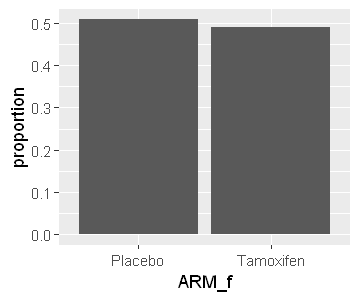

In [28]:
options(repr.plot.width = 3, repr.plot.height = 2.5)

cancer_df %>%
    filter(AGE <= 45) %>%
    group_by(ARM_f) %>%
    summarise(count = n()) %>%
    mutate(proportion = count / sum(count)) %>%
    ggplot(aes(x=ARM_f, y = proportion)) +
    geom_col()

#### Eg 4: Which density values had at least 80 records?

In [29]:
df_density <- cancer_df %>%
    group_by(density) %>%
    summarise(count = n()) %>%
    filter(count >= 80)

dim(df_density)
df_density

[1] 4 2

density,count
0,114
40,84
70,99
80,105


# II. Practice exercises

```
In this exercise we will explore a recent published dataset, from this paper:

Marcato, F., van den Brand, H., Jansen, C. A., Rutten, V. P., Kemp, B., Engel, B., ... & van Reenen, K. (2021). Effects of pre-transport diet, transport duration and transport condition on immune cell subsets, haptoglobin, cortisol and bilirubin in young veal calves. PloS one, 16(2), e0246959.

It is an agricultural experiment but it reminds me of many of the experiments I have seen from students at JCSMR. They have a model organism (in this case, veal), to which they apply one of two treatments (a diet), and one of two stressful events (transport for 6 or 18 hours, called 'duration' here), and measure cortisol, bilirubin, and immune response (titre and flow cytometry) before and after (and, for some of the measures, at multiple time points).

This document contains exercises for you to work through, but they are not arbitrary exercises -- rather they are organised to form an exploratory data analysis of these data. Specifically, the exercises are just the first few things that I actually did when I first looked at this data.
```

In [30]:
# Install the following packages
# install.packages('learnr')
# install.packages("janitor")

In [31]:
library(readr)
library(magrittr)
library(tidyr)
library(ggplot2)
library(dplyr)
library(janitor)

Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'magrittr' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"
Attaching package: 'tidyr'

The following object is masked from 'package:magrittr':

    extract

Warning message:
"package 'janitor' was built under R version 3.6.3"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test



## 1. Read and clean up the data

In [32]:
veal <- read_csv('data/Marcato_2021_immunity.csv')
str(veal)


-- Column specification --------------------------------------------------------
cols(
  .default = col_double(),
  Timepoint = col_character(),
  Uplo = col_character(),
  Bafr = col_character(),
  Diet = col_character(),
  Type = col_character(),
  Bilirubin_1 = col_character(),
  Cortisol_1 = col_character(),
  Haptoglobin = col_character(),
  Titer_IgG = col_character(),
  Titer_IgM = col_character()
)
i Use `spec()` for the full column specifications.



spec_tbl_df [1,024 x 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Timepoint         : chr [1:1024] "CC" "CC" "CC" "CC" ...
 $ Batch             : num [1:1024] 1 1 1 1 1 1 1 1 1 1 ...
 $ Animal            : num [1:1024] 1 2 3 4 5 6 7 8 9 10 ...
 $ Eartag            : num [1:1024] 48454 4796 85085 884 59787 ...
 $ Uplo              : chr [1:1024] "up" "up" "low" "low" ...
 $ Bafr              : chr [1:1024] "back" "back" "back" "back" ...
 $ Pen               : num [1:1024] 4 4 6 6 7 7 2 2 10 10 ...
 $ Corridor          : num [1:1024] 1 1 1 1 1 1 1 1 2 2 ...
 $ Diet              : chr [1:1024] "E" "E" "M" "M" ...
 $ Duration          : num [1:1024] 6 6 6 6 6 6 6 6 6 6 ...
 $ Type              : chr [1:1024] "U" "U" "C" "C" ...
 $ Bilirubin_1       : chr [1:1024] "12.95" "18.51" "26.11" "9.84" ...
 $ Cortisol_1        : chr [1:1024] "7.58" "16.55" "17.49" "12.37" ...
 $ Haptoglobin       : chr [1:1024] "0.31" "0.28" "0.18" "0.55" ...
 $ Titer_IgG         : chr [1:1024] "4.7" "3.9" "4.4"

In [33]:
head(veal, 5)
tail(veal, 5)

Timepoint,Batch,Animal,Eartag,Uplo,Bafr,Pen,Corridor,Diet,Duration,...,CD8+,CD8+ perf+,NK+,NK+ perf+,CD4+,CD4+ perf+,gamma delta+,gamma delta+ perf+,CD14+ large,CD21+ large
CC,1,1,48454,up,back,4,1,E,6,...,7.05,0.67,4.52,1.64,17.90,0.02,41.6,0.06,35.2,8.04
CC,1,2,4796,up,back,4,1,E,6,...,5.73,1.31,6.52,2.86,11.20,0.25,48.9,0.33,34.2,12.50
CC,1,3,85085,low,back,6,1,M,6,...,10.70,1.41,13.30,1.30,0.10,4.17,23.5,0.12,44.7,12.80
CC,1,4,884,low,back,6,1,M,6,...,5.15,2.08,3.16,1.43,0.09,11.80,55.9,0.23,24.1,6.85
CC,1,5,59787,up,back,7,1,E,6,...,8.08,0.78,14.40,2.17,8.47,0.19,36.9,0.07,19.1,16.30


Timepoint,Batch,Animal,Eartag,Uplo,Bafr,Pen,Corridor,Diet,Duration,...,CD8+,CD8+ perf+,NK+,NK+ perf+,CD4+,CD4+ perf+,gamma delta+,gamma delta+ perf+,CD14+ large,CD21+ large
Week 5,2,124,64693,up,back,62,8,M,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,125,9797,low,front,63,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,126,40277,low,front,63,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,127,902,low,front,64,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,128,63889,low,front,64,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### clean up the data using clean_names()  
Many of the later columns here have spaces or punctuation that is a pain to work with.  
A convenient way of dealing with this is to use the clean_names() function from the janitor package.

In [34]:
veal <- clean_names(veal)
attr(veal, 'spec') <- NULL # this just helps display things mores concisely
str(veal)

spec_tbl_df [1,024 x 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timepoint       : chr [1:1024] "CC" "CC" "CC" "CC" ...
 $ batch           : num [1:1024] 1 1 1 1 1 1 1 1 1 1 ...
 $ animal          : num [1:1024] 1 2 3 4 5 6 7 8 9 10 ...
 $ eartag          : num [1:1024] 48454 4796 85085 884 59787 ...
 $ uplo            : chr [1:1024] "up" "up" "low" "low" ...
 $ bafr            : chr [1:1024] "back" "back" "back" "back" ...
 $ pen             : num [1:1024] 4 4 6 6 7 7 2 2 10 10 ...
 $ corridor        : num [1:1024] 1 1 1 1 1 1 1 1 2 2 ...
 $ diet            : chr [1:1024] "E" "E" "M" "M" ...
 $ duration        : num [1:1024] 6 6 6 6 6 6 6 6 6 6 ...
 $ type            : chr [1:1024] "U" "U" "C" "C" ...
 $ bilirubin_1     : chr [1:1024] "12.95" "18.51" "26.11" "9.84" ...
 $ cortisol_1      : chr [1:1024] "7.58" "16.55" "17.49" "12.37" ...
 $ haptoglobin     : chr [1:1024] "0.31" "0.28" "0.18" "0.55" ...
 $ titer_ig_g      : chr [1:1024] "4.7" "3.9" "4.4" "4.9" ...
 $ titer_ig_m      

In [35]:
head(veal, 5)
tail(veal, 5)

timepoint,batch,animal,eartag,uplo,bafr,pen,corridor,diet,duration,...,cd8,cd8_perf,nk,nk_perf,cd4,cd4_perf,gamma_delta,gamma_delta_perf,cd14_large,cd21_large
CC,1,1,48454,up,back,4,1,E,6,...,7.05,0.67,4.52,1.64,17.90,0.02,41.6,0.06,35.2,8.04
CC,1,2,4796,up,back,4,1,E,6,...,5.73,1.31,6.52,2.86,11.20,0.25,48.9,0.33,34.2,12.50
CC,1,3,85085,low,back,6,1,M,6,...,10.70,1.41,13.30,1.30,0.10,4.17,23.5,0.12,44.7,12.80
CC,1,4,884,low,back,6,1,M,6,...,5.15,2.08,3.16,1.43,0.09,11.80,55.9,0.23,24.1,6.85
CC,1,5,59787,up,back,7,1,E,6,...,8.08,0.78,14.40,2.17,8.47,0.19,36.9,0.07,19.1,16.30


timepoint,batch,animal,eartag,uplo,bafr,pen,corridor,diet,duration,...,cd8,cd8_perf,nk,nk_perf,cd4,cd4_perf,gamma_delta,gamma_delta_perf,cd14_large,cd21_large
Week 5,2,124,64693,up,back,62,8,M,6,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,125,9797,low,front,63,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,126,40277,low,front,63,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,127,902,low,front,64,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Week 5,2,128,63889,low,front,64,8,M,18,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### Change . to NA

```
When we look at this str() output, we notice that some of the columns that we expect to be numbers, are not. If you look at the csv you notice that they have '.' instead of empty cells where data are missing. Converting these to numberic will work (and turn those dots into NAs), but it will show a warning.
```

In [36]:
veal$bilirubin_1 <- as.numeric(veal$bilirubin_1)
veal$cortisol_1 <- as.numeric(veal$cortisol_1)
veal$haptoglobin <- as.numeric(veal$haptoglobin)
veal$titer_ig_g <- as.numeric(veal$titer_ig_g)
veal$titer_ig_m <- as.numeric(veal$titer_ig_m)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

## 2. Initial checks of experimental setup

In [37]:
str(veal)

spec_tbl_df [1,024 x 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timepoint       : chr [1:1024] "CC" "CC" "CC" "CC" ...
 $ batch           : num [1:1024] 1 1 1 1 1 1 1 1 1 1 ...
 $ animal          : num [1:1024] 1 2 3 4 5 6 7 8 9 10 ...
 $ eartag          : num [1:1024] 48454 4796 85085 884 59787 ...
 $ uplo            : chr [1:1024] "up" "up" "low" "low" ...
 $ bafr            : chr [1:1024] "back" "back" "back" "back" ...
 $ pen             : num [1:1024] 4 4 6 6 7 7 2 2 10 10 ...
 $ corridor        : num [1:1024] 1 1 1 1 1 1 1 1 2 2 ...
 $ diet            : chr [1:1024] "E" "E" "M" "M" ...
 $ duration        : num [1:1024] 6 6 6 6 6 6 6 6 6 6 ...
 $ type            : chr [1:1024] "U" "U" "C" "C" ...
 $ bilirubin_1     : num [1:1024] 12.95 18.51 26.11 9.84 19.05 ...
 $ cortisol_1      : num [1:1024] 7.58 16.55 17.49 12.37 3.55 ...
 $ haptoglobin     : num [1:1024] 0.31 0.28 0.18 0.55 0.17 0.15 0.2 0.18 0.27 0.19 ...
 $ titer_ig_g      : num [1:1024] 4.7 3.9 4.4 4.9 5.3 5.7 5.4 5.2

```
The first thing we will do check that we understand how the data are organised. If we had performed the experiment ourselves, we would know what to expect and should compare the data to that knowledge (to make sure nothing has gone wrong between the experiment and now); when the data are not ours it helps us understand what we are analysing.
```

### First, how many observations (i.e., rows of data) are there for each timepoint?

In [38]:
veal %>%
  group_by(timepoint) %>%
  summarise(count = n())

timepoint,count
CC,128
T0,128
T24,128
T4,128
T48,128
Week 1,128
Week 3,128
Week 5,128


```
What does this imply? That there were 128 veal, all of which were sampled at each time point.
```

### How many different animals are there for each combination of diet and duration at timepoint 'CC'?

In [39]:
veal %>%
  filter(timepoint =='CC')%>%
  group_by(diet, duration) %>%
  summarise(count = n())

`summarise()` has grouped output by 'diet'. You can override using the `.groups` argument.


diet,duration,count
E,6,32
E,18,32
M,6,32
M,18,32


### Look at the timepoint, diet, duration, and eartag of animal 1 (at all timepoints):

In [40]:
veal %>%
  filter(animal == 1) %>%
  select(timepoint, diet, duration, eartag)

timepoint,diet,duration,eartag
CC,E,6,48454
T0,E,6,48454
T24,M,6,73981
T4,M,6,73981
T48,M,6,73981
Week 1,E,18,22185
Week 3,E,18,22185
Week 5,E,18,53452


```
This should worry you -- these aren't the same animal! Instead we should use the eartag column. 
```

### Look at the timepoint, diet, duration, and animal id of eartag 48454 (at all timepoints):

In [41]:
veal %>%
  filter(eartag == 48454) %>%
  select(timepoint, diet, duration, animal)

timepoint,diet,duration,animal
CC,E,6,1
T0,E,6,1
T24,E,6,3
T4,E,6,3
T48,E,6,3
Week 1,E,6,7
Week 3,E,6,7
Week 5,E,6,7


```
This looks a lot better. It is important to check what is going on in your data, and think critically about the output   you see -- does it make sense? This process should help you understand what you are doing, diagnose any errors, etc.
```

## 3. Initial plots & factors

In [42]:
# (reminder what our data now looks like)
str(veal)

spec_tbl_df [1,024 x 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timepoint       : chr [1:1024] "CC" "CC" "CC" "CC" ...
 $ batch           : num [1:1024] 1 1 1 1 1 1 1 1 1 1 ...
 $ animal          : num [1:1024] 1 2 3 4 5 6 7 8 9 10 ...
 $ eartag          : num [1:1024] 48454 4796 85085 884 59787 ...
 $ uplo            : chr [1:1024] "up" "up" "low" "low" ...
 $ bafr            : chr [1:1024] "back" "back" "back" "back" ...
 $ pen             : num [1:1024] 4 4 6 6 7 7 2 2 10 10 ...
 $ corridor        : num [1:1024] 1 1 1 1 1 1 1 1 2 2 ...
 $ diet            : chr [1:1024] "E" "E" "M" "M" ...
 $ duration        : num [1:1024] 6 6 6 6 6 6 6 6 6 6 ...
 $ type            : chr [1:1024] "U" "U" "C" "C" ...
 $ bilirubin_1     : num [1:1024] 12.95 18.51 26.11 9.84 19.05 ...
 $ cortisol_1      : num [1:1024] 7.58 16.55 17.49 12.37 3.55 ...
 $ haptoglobin     : num [1:1024] 0.31 0.28 0.18 0.55 0.17 0.15 0.2 0.18 0.27 0.19 ...
 $ titer_ig_g      : num [1:1024] 4.7 3.9 4.4 4.9 5.3 5.7 5.4 5.2

### Cortisol is a hormone commonly used to measure stress.  
Create a line graph with timepoint on the x axis, cortisol on the y axis, group=eartag (so that you get one line per animal) and a facet_grid with diet by duration.

Warning message:
"Removed 63 row(s) containing missing values (geom_path)."

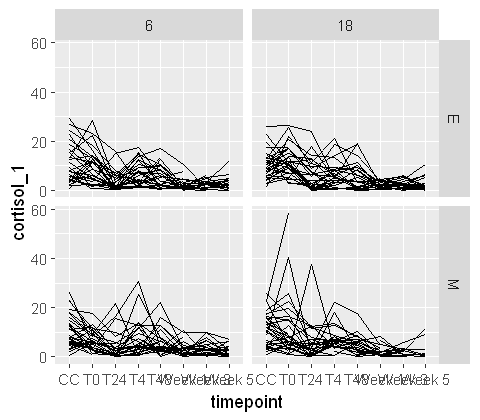

In [43]:
options(repr.plot.width = 4, repr.plot.height = 3.5)

ggplot(veal, aes(x=timepoint, y = cortisol_1, group=eartag))+
  geom_line() + 
  facet_grid(diet~duration)

### What do you notice is wrong with the above plot?

The x axis is in the wrong order! you can fix this using factor() and specifying the levels.

Fix the factor levels and remake the plot (just paste the plot code again).

Warning message:
"Removed 63 row(s) containing missing values (geom_path)."

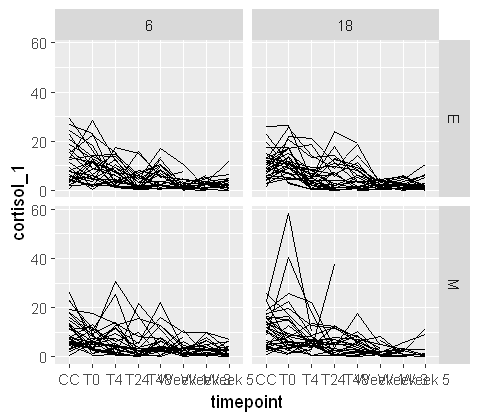

In [44]:
veal$timepoint <- factor(veal$timepoint, levels = c('CC',
                                                    'T0',
                                                    'T4',
                                                    'T8',
                                                    'T24',
                                                    'T48',
                                                    'Week 1',
                                                    'Week 3',
                                                    'Week 5'))

ggplot(veal, aes(x=timepoint, y = cortisol_1, group=eartag))+
  geom_line() + 
  facet_grid(diet~duration)

### We see that there are some missing values in these data where the lines stop unexpectedly. 
Check where they are by counting the number of NAs values for cortisol that appear at each timepoint. To do this, you probably want to use is.na() in a filter().

In [45]:
veal %>%
  filter(is.na(cortisol_1)) %>%
  group_by(timepoint) %>%
  summarise(count = n())

timepoint,count
CC,2
T4,7
T24,17
T48,23
Week 1,21
Week 3,43
Week 5,39


```
Most of the interesting changes in these data appear to occur in the first 48 hours.
Filter the 'Week x' timepoints out of the data before piping (%>%) to ggplot (You can use %in% to filter for multiple   timepoints). Plot bilirubin on the y axis (still as a line plot, with the same facets as above).
```

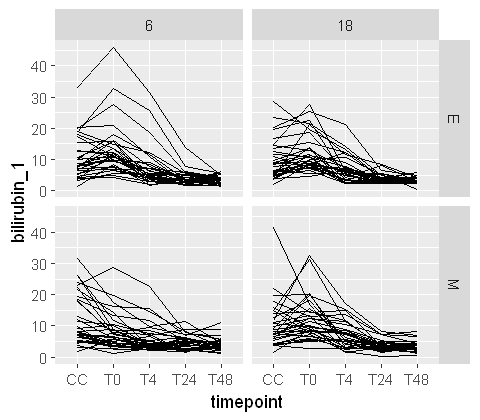

In [46]:
veal %>% filter(!timepoint %in% c('Week 1', 'Week 3','Week 5')) %>%
ggplot(aes(x=timepoint, y = bilirubin_1, group=eartag))+
  geom_line() + 
  facet_grid(diet~duration)

```
The lines contain a lot of important information but are hard to read.
Instead of the lines, change to a boxplot. This time fill by diet, and facet by duration.
```

Warning message:
"Removed 3 rows containing non-finite values (stat_boxplot)."

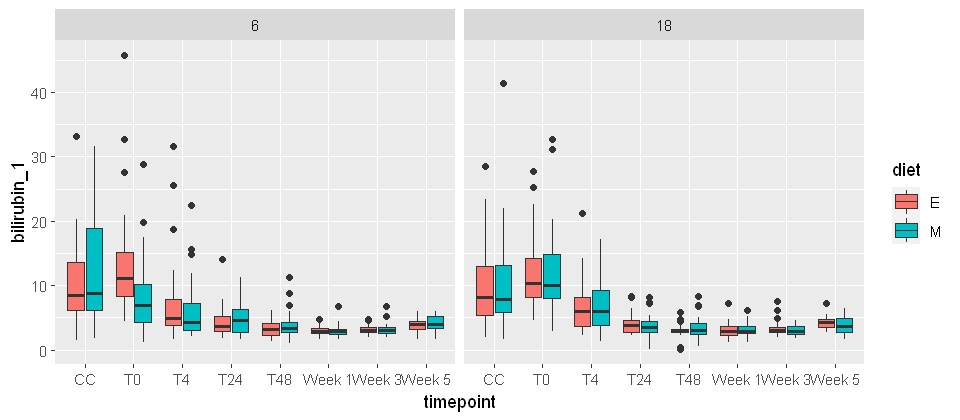

In [47]:
options(repr.plot.width = 8, repr.plot.height = 3.5)

ggplot(veal, aes(x=timepoint, 
                 y=bilirubin_1,
                 fill=diet))+
  geom_boxplot()+
  facet_grid(~duration)

```
Visually there are hints that there might be something going on here, but a statistical model is needed to say anything conclusive.
```

## 4. FACS data

In [48]:
# (reminder what our data now looks like)
str(veal)

spec_tbl_df [1,024 x 37] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ timepoint       : Factor w/ 9 levels "CC","T0","T4",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ batch           : num [1:1024] 1 1 1 1 1 1 1 1 1 1 ...
 $ animal          : num [1:1024] 1 2 3 4 5 6 7 8 9 10 ...
 $ eartag          : num [1:1024] 48454 4796 85085 884 59787 ...
 $ uplo            : chr [1:1024] "up" "up" "low" "low" ...
 $ bafr            : chr [1:1024] "back" "back" "back" "back" ...
 $ pen             : num [1:1024] 4 4 6 6 7 7 2 2 10 10 ...
 $ corridor        : num [1:1024] 1 1 1 1 1 1 1 1 2 2 ...
 $ diet            : chr [1:1024] "E" "E" "M" "M" ...
 $ duration        : num [1:1024] 6 6 6 6 6 6 6 6 6 6 ...
 $ type            : chr [1:1024] "U" "U" "C" "C" ...
 $ bilirubin_1     : num [1:1024] 12.95 18.51 26.11 9.84 19.05 ...
 $ cortisol_1      : num [1:1024] 7.58 16.55 17.49 12.37 3.55 ...
 $ haptoglobin     : num [1:1024] 0.31 0.28 0.18 0.55 0.17 0.15 0.2 0.18 0.27 0.19 ...
 $ titer_ig_g      : num [1:1024] 4.7 3.

### The FACS was only done at timepoints CC and T0, so we just want to work with those times.

In [49]:
# Filter the dataset to get just those timepoints, store this with the name veal_start.
veal_start <- veal %>% 
                filter(timepoint == 'CC' | timepoint == 'T0')

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."

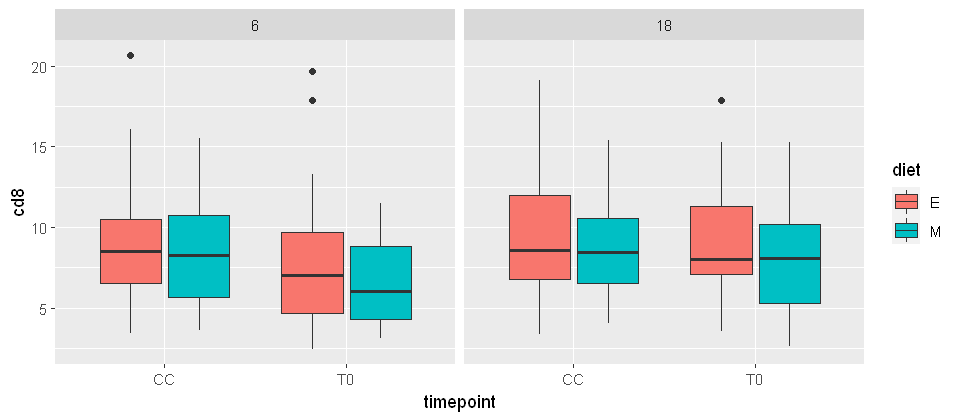

In [50]:
# Plot a boxplot with these data, with x as timepoint, y as cd8, fill by diet and facet by duration.
ggplot(veal_start, aes(x=timepoint, 
                       y=cd8,
                       fill=diet))+
  geom_boxplot()+
  facet_grid(~duration)

### Now try a line plot, remember you need group=eartag. It may help to facet by both diet and duration.

Warning message:
"Removed 1 row(s) containing missing values (geom_path)."

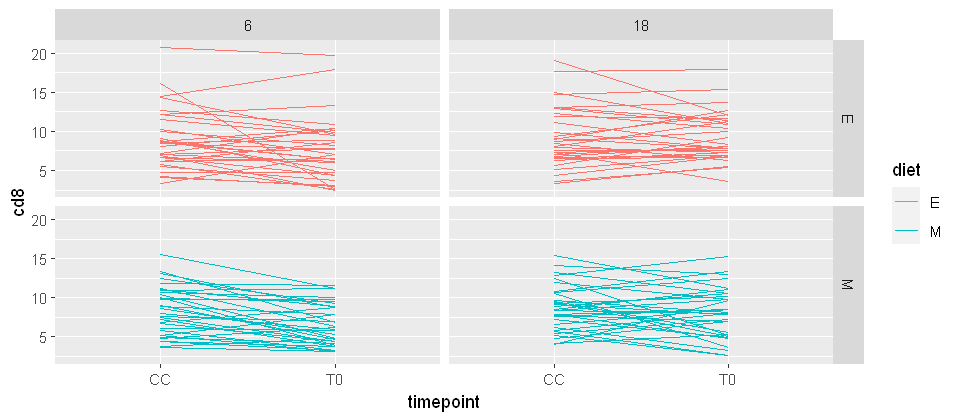

In [51]:
ggplot(veal_start, aes(x=timepoint, 
                       y=cd8,
                       col=diet,
                       group=eartag))+
  geom_line()+
  facet_grid(diet~duration)

```
It does look like there is something happening here, but it is difficult to diagnose like this. Something that might be more informative is the change in cd8 between time CC and time T0. 
We can do this, but it needs something a little complicated: a function called pivot_wider(). We will look at how to do this in more detail in the next workshop, for now you should work from / edit this example:
```

Warning message:
"Removed 1 rows containing non-finite values (stat_boxplot)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

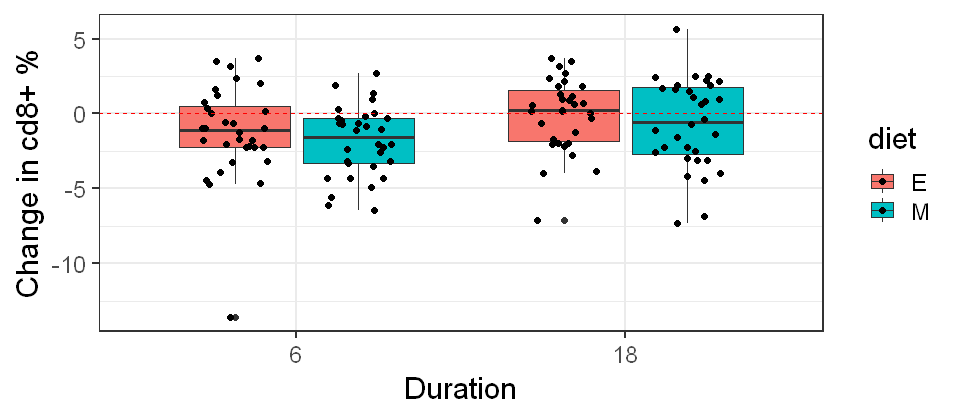

In [52]:
veal_start %>%
  select(eartag, diet, duration, timepoint, cd8) %>%
  pivot_wider(names_from = timepoint,
              values_from = cd8) %>%
  mutate(change_in_cd8 = T0 - CC) %>%
  ggplot(aes(x=factor(duration),
             y=change_in_cd8, 
             fill=diet))+
  
  geom_boxplot() + # geom_boxplot(outlier.size = 0)+
  geom_point(position = position_jitterdodge(jitter.width = 0.2))+
  geom_hline(yintercept = 0,
             col='red',
             lty='dashed')+
  xlab('Duration') + 
  ylab('Change in cd8+ %')+
  theme_bw(base_size = 18)

```
An alternative way to explore this data is to use a density plot. Copy/paste and edit the example above to visualise this using a density plot.
```

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

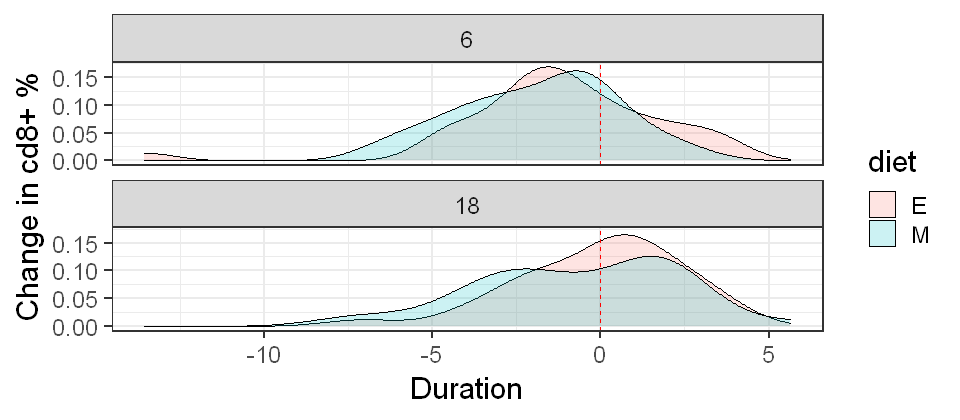

In [53]:
veal_start %>%
  select(eartag,diet,duration,timepoint,cd8) %>%
  pivot_wider(names_from = timepoint,
              values_from = cd8) %>%
  mutate(change_in_cd8 = T0 - CC) %>%
  ggplot(aes(x=change_in_cd8, fill=diet))+
  geom_density(alpha=0.2)+
  facet_wrap(~duration, ncol=1)+
  geom_vline(xintercept = 0,col='red',lty='dashed')+
  xlab('Duration')+ylab('Change in cd8+ %')+
  theme_bw(base_size = 18)

```
Instead of a graphical summary, it might be easier to summarise this information numerically (either as a table, or data that would go in a results section).

For each combination of diet and duration, show the proportion of veal that had an increase in cd8 between time CC and T0.
Hints:
You probably want to use something like ```is_increase = if_else(change_in_cd8 > 0,'Increase','Decrease')``` in a mutate statement, then group_by, summarise and then a few more statements to clean up to get what you want.
```

In [54]:
veal_start %>%
  select(eartag, diet, duration, timepoint, cd8) %>%
  pivot_wider(names_from = timepoint,
              values_from = cd8) %>%
  mutate(change_in_cd8 = T0 - CC) %>%
  mutate(is_increase = if_else(change_in_cd8 > 0,'Increase','Decrease')) %>%
  group_by(diet, duration, is_increase) %>%
  summarise(count = n()) %>%
  mutate(proportion = count/sum(count)) %>%
  filter(is_increase == 'Increase') %>%
  arrange(duration) %>%
  select(diet,duration, proportion)

`summarise()` has grouped output by 'diet', 'duration'. You can override using the `.groups` argument.


diet,duration,proportion
E,6,0.34375
M,6,0.18750
E,18,0.56250
M,18,0.46875
